In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('all_stocks_5yr.csv', parse_dates=['date'])
# or remove parse_dates and run
# the second option gives you ability to format the date easier
# df.date = pd.to_datetime(df.date)
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [4]:
df2 = df.set_index(['Name', 'date']).sort_index()
df2.head()

open   high    low  close   volume
Name date                                           
A    2013-02-08  45.07  45.35  45.00  45.08  1824755
     2013-02-11  45.17  45.18  44.45  44.60  2915405
     2013-02-12  44.81  44.95  44.50  44.62  2373731
     2013-02-13  44.81  45.24  44.68  44.75  2052338
     2013-02-14  44.72  44.78  44.36  44.58  3826245

In [5]:
df2.loc['AAL']

,open,high,low,close,volume
date,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500
2013-02-11,14.89,15.01,14.26,14.46,8882000
2013-02-12,14.45,14.51,14.10,14.27,8126000
2013-02-13,14.30,14.94,14.25,14.66,10259500
2013-02-14,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...
2018-02-01,54.00,54.64,53.59,53.88,3623078
2018-02-02,53.49,53.99,52.03,52.10,5109361
2018-02-05,51.99,52.39,49.75,49.76,6878284


In [6]:
aal = df2.xs('AAL')

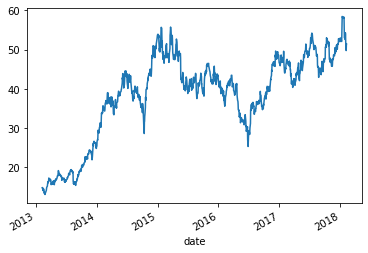

In [7]:
aal.close.plot();

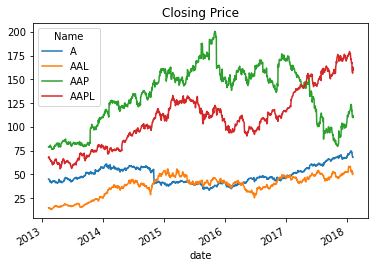

In [8]:
idx = pd.IndexSlice
df_a = df2.loc[idx['A':'AB', :], :]
df_a.close.unstack(level='Name').plot(title='Closing Price');

## Slicing DateTimes

In [10]:
aal_2017 = aal.loc['2017']
aal_2017

,open,high,low,close,volume
date,,,,,
2017-01-03,47.28,47.340,46.135,46.30,6737752
2017-01-04,46.63,47.435,46.350,46.70,5859604
2017-01-05,46.52,46.930,45.610,45.89,6825316
2017-01-06,45.85,46.720,45.470,46.21,7260197
2017-01-09,46.01,47.340,45.780,47.08,4739142
...,...,...,...,...,...
2017-12-22,52.72,52.880,52.420,52.59,2425104
2017-12-26,52.35,53.215,52.330,52.85,2774316
2017-12-27,52.80,52.880,52.060,52.40,2831434


In [11]:
aal[idx['2017':'2017-03-10']]

,open,high,low,close,volume
date,,,,,
2017-01-03,47.2800,47.3400,46.1350,46.30,6737752
2017-01-04,46.6300,47.4350,46.3500,46.70,5859604
2017-01-05,46.5200,46.9300,45.6100,45.89,6825316
2017-01-06,45.8500,46.7200,45.4700,46.21,7260197
2017-01-09,46.0100,47.3400,45.7800,47.08,4739142
2017-01-10,47.0000,48.5100,46.9700,48.48,7483764
2017-01-11,49.2900,49.9000,48.1000,48.64,6925770
2017-01-12,48.6700,49.0000,46.8400,48.10,5448098
2017-01-13,48.1600,48.4300,47.5400,47.65,3541980


In [12]:
df2.loc[idx[:, '2017':'2017-01-05'], :]

open     high       low   close   volume
Name date                                                  
A    2017-01-03   45.93   46.750   45.7400   46.49  1739726
     2017-01-04   46.93   47.380   46.8162   47.10  1821264
AAL  2017-01-03   47.28   47.340   46.1350   46.30  6737752
     2017-01-04   46.63   47.435   46.3500   46.70  5859604
AAP  2017-01-03  170.78  171.360  169.3100  170.60   691526
...                 ...      ...       ...     ...      ...
ZBH  2017-01-04  103.88  105.345  103.3800  104.28  1502751
ZION 2017-01-03   43.74   44.330   42.7200   43.18  2896301
     2017-01-04   43.45   43.910   43.3500   43.80  1907508
ZTS  2017-01-03   53.88   54.380   53.3350   53.59  3580369
     2017-01-04   53.72   54.180   53.1000   54.11  3316309

[999 rows x 5 columns]

In [13]:
df2.loc[idx[:, '2017':'2017-01-05'], :]

open     high       low   close   volume
Name date                                                  
A    2017-01-03   45.93   46.750   45.7400   46.49  1739726
     2017-01-04   46.93   47.380   46.8162   47.10  1821264
AAL  2017-01-03   47.28   47.340   46.1350   46.30  6737752
     2017-01-04   46.63   47.435   46.3500   46.70  5859604
AAP  2017-01-03  170.78  171.360  169.3100  170.60   691526
...                 ...      ...       ...     ...      ...
ZBH  2017-01-04  103.88  105.345  103.3800  104.28  1502751
ZION 2017-01-03   43.74   44.330   42.7200   43.18  2896301
     2017-01-04   43.45   43.910   43.3500   43.80  1907508
ZTS  2017-01-03   53.88   54.380   53.3350   53.59  3580369
     2017-01-04   53.72   54.180   53.1000   54.11  3316309

[999 rows x 5 columns]

In [14]:
df2.to_pickle('stocks.pkl')